## Final Project Submission

Please fill out:
* Student name: Johnmark Kibui
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Overview
Microsoft Movie Studio plans to produce films in genres that resonate with audiences, based on current box office trends. To inform decision-making, an analysis of the most recent movies will be done, focusing on the budget to produce the movies and the money they generate.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Understanding The Data

In [27]:
# load data
# df2 = pd.read_csv("C:/Users/Hp/Phase1_Project/dsc-phase-1-project/DataSets/bom.movie_gross.csv")
# df3 = pd.read_csv("C:/Users/Hp/Phase1_Project/dsc-phase-1-project/DataSets/tmdb.movies.csv", index_col=0)
df = pd.read_csv("C:/Users/Hp/Phase1_Project/dsc-phase-1-project/DataSets/tn.movie_budgets.csv", index_col=0)


# tn.movie_budgets

In [28]:
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
df.tail()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [262]:
# sort table by date: latest to earliest by first converting release_date to date-time
df["release_date"] = pd.to_datetime(df["release_date"])
date_sorted = df.sort_values(by="release_date", ascending=False)
date_sorted.head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
95,2020-12-31,Moonfall,"$150,000,000",$0,$0
6,2020-12-31,Hannibal the Conqueror,"$50,000,000",$0,$0
36,2020-02-21,Call of the Wild,"$82,000,000",$0,$0
81,2019-12-31,Army of the Dead,"$90,000,000",$0,$0
16,2019-12-31,Eli,"$11,000,000",$0,$0
72,2019-12-31,355,"$75,000,000",$0,$0
44,2019-12-31,Down Under Cover,"$40,000,000",$0,$0
30,2019-12-31,Reagan,"$25,000,000",$0,$0
13,2019-12-31,Rogue City,"$13,000,000",$0,$0


### Observation
Based on the 50 most recent movies; from 2020, more than 20 of them do not have a domestic_gross or worldwide gross.
We can assume, either the movie was not released or the data was simply not filled. We will drop these rows.
- Most of the movies made a profit(ROI), so we can find out how much they made.

# Cleaning & Organizing data.

In [32]:
date_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 95 to 78
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   object        
 3   domestic_gross     5782 non-null   object        
 4   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 271.0+ KB


In [40]:
# convert currency columns to int, removing $ and , on the figures.
# domestic_gross
date_sorted['production_budget'] = date_sorted['production_budget'].str.replace('$', '')
date_sorted['production_budget'] = date_sorted['production_budget'].str.replace(',', '')
date_sorted['production_budget'] = date_sorted['production_budget'].astype('int64')

In [33]:
# domestic_gross
date_sorted['domestic_gross'] = date_sorted['domestic_gross'].str.replace('$', '')
date_sorted['domestic_gross'] = date_sorted['domestic_gross'].str.replace(',', '')

In [34]:
# worldwide_gross
date_sorted['worldwide_gross'] = date_sorted['worldwide_gross'].str.replace('$', '')
date_sorted['worldwide_gross'] = date_sorted['worldwide_gross'].str.replace(',', '')

In [41]:
# convert the gross columns to int
date_sorted['domestic_gross'] = date_sorted['domestic_gross'].astype('int64')
date_sorted['worldwide_gross'] = date_sorted['worldwide_gross'].astype('int64')
date_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5234 entries, 42 to 78
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5234 non-null   datetime64[ns]
 1   movie              5234 non-null   object        
 2   production_budget  5234 non-null   int64         
 3   domestic_gross     5234 non-null   int64         
 4   worldwide_gross    5234 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 245.3+ KB


In [278]:
# drop rows with 0 as the domestic_gross and worldwide_gross
date_sorted = date_sorted[date_sorted !=0].dropna()

# Analysis
We use the 50 most recent movies for our analyis. We can see our data mainly has movies from early 2018 and mid 2019 movies. Our goal is to get the highest grossing movies

In [51]:
# Movies and their Return On Investment(ROI)
# Add column for ROI.
roi = date_sorted['domestic_gross'] + date_sorted['worldwide_gross'] -date_sorted['production_budget']
date_sorted['roi'] = roi

date_sorted.head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
id,,,,,,
42,2019-06-14,Men in Black: International,110000000,3100000,3100000,-103800000
98,2019-06-14,Shaft,30000000,600000,600000,-28800000
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-157475300
35,2019-06-07,Late Night,4000000,246305,246305,-3507390
81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,97147151
71,2019-05-31,Rocketman,41000000,57342725,108642725,124985450
25,2019-05-31,Godzilla: King of the Monsters,170000000,85576941,299276941,214853882
66,2019-05-31,MA,5000000,36049540,44300625,75350165
13,2019-05-24,BrightBurn,7000000,16794432,27989498,37783930


In [59]:
# 'date_sorted' with only 50 most recent movies to work with.
date_sorted = date_sorted.iloc[:50, :]
len(date_sorted)

50

In [271]:
# sorted table by roi
roi_sorted = date_sorted.sort_values(by=['roi'], ascending=False)
roi_sorted.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
id,,,,,,
96,2019-03-08,Captain Marvel,175000000,426525952,1123061550,1374587502
36,2018-12-21,Aquaman,160000000,335061807,1146894640,1321956447
81,2019-05-24,Aladdin,182000000,246734314,619234314,683968628
56,2019-02-22,How to Train Your Dragon: The Hidden World,129000000,160791800,519258283,551050083
97,2019-04-05,Shazam!,85000000,139606856,362899733,417506589


In [80]:
# to confirm the top figure is correct
print('Highest ROI is:', date_sorted['roi'].max())

Highest ROI is: 1374587502


We can see that some movies made a loss. This could be due to reasons like;
- lack of proper marketing
- audience not recieving the movie as expected.
- not enough budget to produce a quality movie.

We focus on the highest grossing only.
Those that had a high ROI maybe due to proper marketing or having well known actors/actresses as casts. We can have a bargraph represent all this data visually for 50 most recent movies.

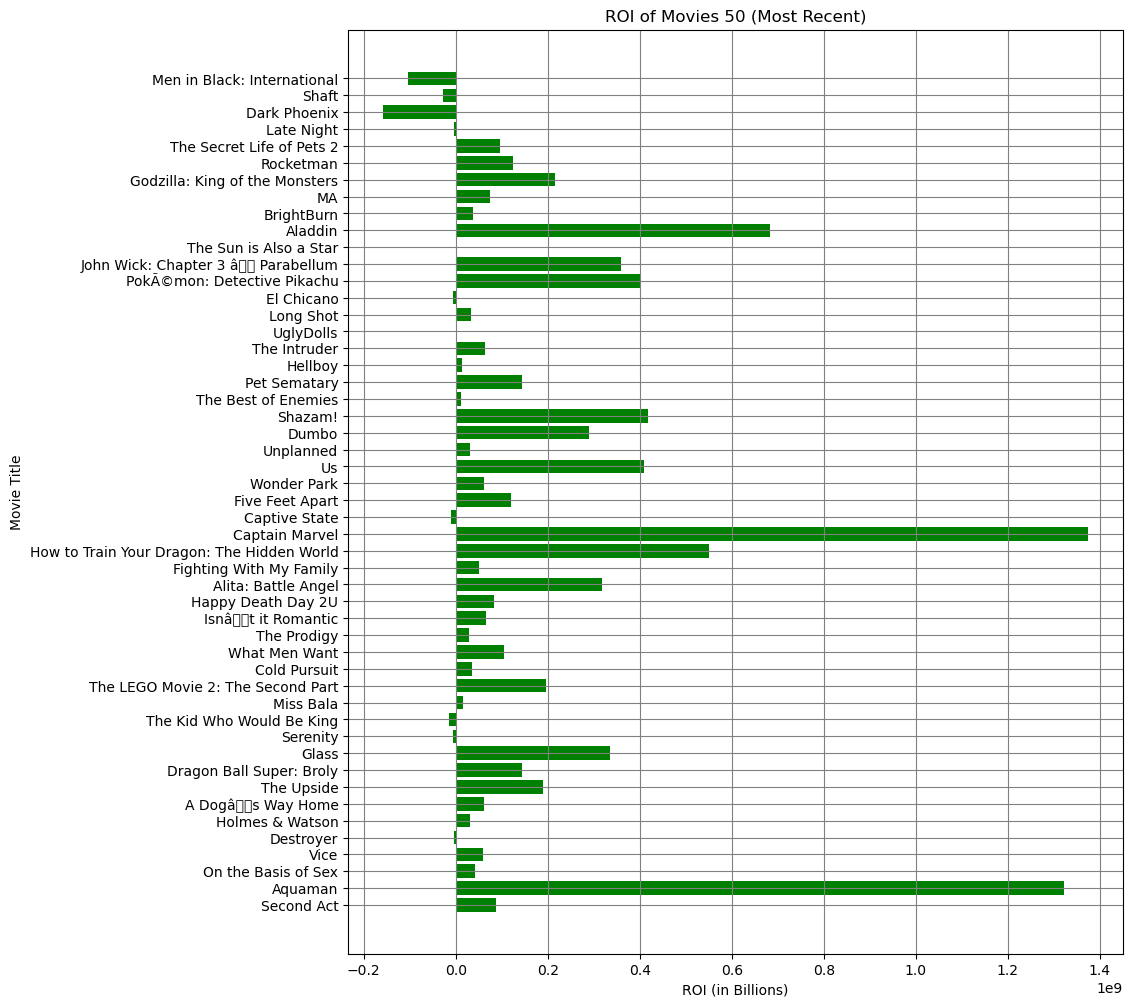

In [78]:
# bar graph roi vs movies
# Take the first 50 rows of the DataFrame
date_sorted = date_sorted[:50]

# Sort the DataFrame by date in descending order
date_sorted = date_sorted.sort_values(by=['release_date'], ascending=True)

# Extract the ROI values from the DataFrame
roi = date_sorted['roi'].to_numpy()

# Extract the movie titles from the DataFrame
movie_titles = date_sorted['movie'].to_numpy()

# Create a horizontal bar graph
fig, ax = plt.subplots(figsize=(10, 12))
plt.barh(movie_titles, roi, color='green')
ax.grid(axis='both', color='grey')

# Set the title and labels for the graph
plt.title('ROI of Movies 50 (Most Recent)')
plt.xlabel('ROI (in Billions)')
plt.ylabel('Movie Title')

# ax.set_xlim(0, 4)
plt.show()

From the chart:
- 'Men in Black: International', which made a loss, is the most recent and 'Second Act' being the earliest.
- In this chart, those with roi above 1 Billion were mainly the superhero movies.
We can compare 'production_budget' vs 'roi' in a graph to check for their correlation.

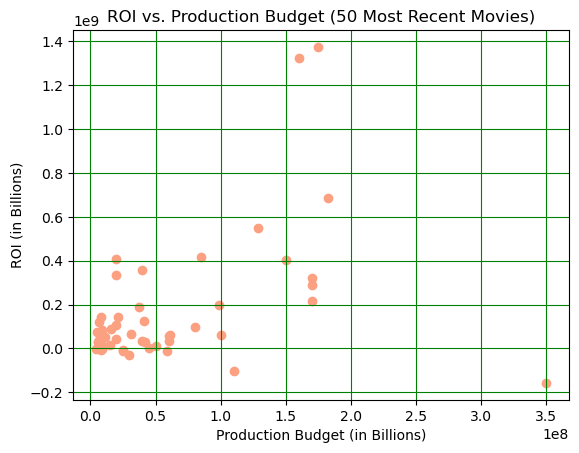

In [70]:
# Scatterplot- roi vs production budget
# Create a scatter plot
import seaborn as sns
sns.set_palette(sns.color_palette("Reds", 2))

# Create a scatter plot
plt.scatter(date_sorted['production_budget'], date_sorted['roi'])
plt.grid(which='both', color='Green')

# Label the axes
plt.xlabel('Production Budget (in Billions)')
plt.ylabel('ROI (in Billions)')

# Title the chart
plt.title('ROI vs. Production Budget (50 Most Recent Movies)')

# Show the plot
plt.show()

##### Conclusion
A quick view shows that the the high production budget generally yielded the high ROI in the sample movies.
A lot of movies with production budget below 1 billion yielded an ROI less than a billion, with exceptions. Not to ignore
the movie that had about 3.5 billion production budget but made a loss. A possible reason for this would be poor marketing, or not being received well by audience.
We can also conclude from the table, that worldwide_gross is a big contributer to the ROI. So international audience should be considered.

# Dataset - tmdb.movies.csv

In [81]:
df2 = pd.read_csv("C:/Users/Hp/Phase1_Project/dsc-phase-1-project/DataSets/tmdb.movies.csv", index_col=0)
df2.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [82]:
# To get years recorded
df2['release_date'].unique()

array(['2010-11-19', '2010-03-26', '2010-05-07', ..., '2018-05-08',
       '2018-08-02', '2018-05-26'], dtype=object)

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


## Cleaning df2

#### To add a new column 'genres', representing the genre_ids 

In [84]:
# convert 'release_date' to datetime
df2['release_date'] = pd.to_datetime(df2['release_date'])
df2['release_date'].info()

<class 'pandas.core.series.Series'>
Index: 26517 entries, 0 to 26516
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
26517 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 414.3 KB


In [203]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 2.0+ MB


In [87]:
df2.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Since thecolumns have the right datatypes to work with, we can analyse.
## Sorting

We can have a new dataframe, 'df2_year_sorted', that contains 50 most recent movies.

In [269]:
# Sort by year, to get the most recent movies
df2_year_sorted = df2.sort_values(by='release_date', ascending=False)
df2_year_sorted = df2_year_sorted.head(50)
df2_year_sorted.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26057,"[27, 80, 80, 80, 80, 80, 80]",570704,en,Murdery Christmas,0.840,2020-12-25,Murdery Christmas,0.0,1
24265,"[10749, 18]",428836,en,Ophelia,8.715,2019-06-28,Ophelia,0.0,4
24892,[99],541577,en,This Changes Everything,3.955,2019-06-28,This Changes Everything,0.0,1
24819,[18],481880,en,Trial by Fire,4.480,2019-05-17,Trial by Fire,7.0,3
24297,[18],415085,en,All Creatures Here Below,8.316,2019-05-17,All Creatures Here Below,5.0,5


We can have a new dataframe, 'df2_popularity_sorted', that contains the same movies, but sorted by popularity, from the 'df2_year_sorted'

In [268]:
# Movie with highest popularity value
df2_popularity_sorted = df2_year_sorted.sort_values(by='popularity', ascending=False)
df2_popularity_sorted.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23930,"[80, 53, 35, 18, 9648]",396461,en,Under the Silver Lake,17.182,2019-04-19,Under the Silver Lake,6.4,338
23945,"[18, 27]",507076,fr,Climax,16.574,2019-03-01,Climax,7.3,352
23947,"[80, 28, 53]",438674,en,Dragged Across Concrete,16.389,2019-03-22,Dragged Across Concrete,6.6,127
24003,"[18, 9648, 53]",411144,en,We Have Always Lived in the Castle,14.028,2019-05-17,We Have Always Lived in the Castle,5.2,24
24084,"[53, 18]",500904,en,A Vigilante,11.743,2019-03-29,A Vigilante,5.1,68


In [216]:
print('Maximum popularity value:', df2_popularity_sorted['popularity'].max())
print('Minimum popularity value:', df2_popularity_sorted['popularity'].min())
print('Average popularity value:', df2_popularity_sorted['popularity'].mean())

Maximum popularity value: 17.182
Minimum popularity value: 0.6
Average popularity value: 5.946840000000001


The vote_average values do not necessarily mean the movie was well recieved. This could be influenced by factors like the few viewers who watched it and ended up loving the movies. A lot of these viewers may not have voted.

The popularity values could be more valuable in this case, as they may give a better impression of how the movies were recieved in terms of size of the traget audience.

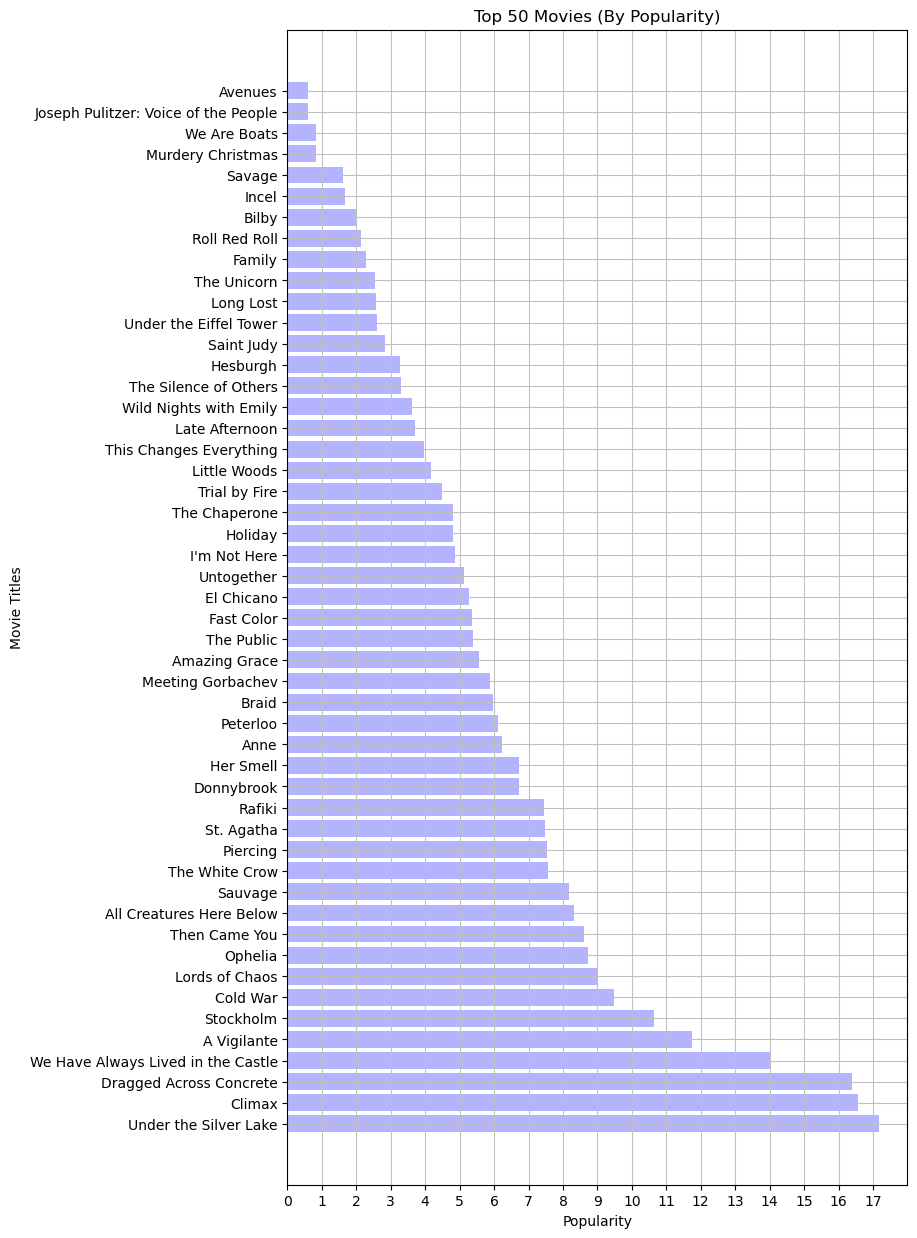

In [217]:
# plotting a graph showing popularity of the 50 movies

# Select the first 50 rows
# Create the bar chart

plt.figure(figsize=(8, 15))

faded_blue = (0.7, 0.7, 1.0)
plt.grid(which='both', color=faded_blue)
plt.barh(df2_popularity_sorted['title'], df2_popularity_sorted['popularity'], color=faded_blue)

plt.xlim(0, 18)
plt.xticks(range(0, 18, 1))


plt.grid(which='both', color='silver')

# Set the labels and title
plt.xlabel('Popularity')
plt.ylabel('Movie Titles')
plt.title('Top 50 Movies (By Popularity)')

# Show the plot
plt.show()

- Maximum popularity value: 17.182
- Minimum popularity value: 0.6
- Average popularity value: 5.946840000000001

Almost half were above the 5.9 average popularity value. We can go ahead and get the movies with a popularity above the average mark, then get the most common genres in that group.

# Getting the most common genres for movies above popularity-average
Having a dictionary of genres repsented by the genre id from; https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee


In [299]:
# movie id keys
movie_genre

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [220]:
# Data frame representing the movies above average popularity value 'top_popular'
top_popular = df2_popularity_sorted[df2_popularity_sorted['popularity'] > 5.9]
top_popular
print(f'There are {len(top_popular)} movies above average population value')

There are 21 movies above average population value


### To now check the genres that these moves represent..

In [267]:
top_popular.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23930,"[80, 53, 35, 18, 9648]",396461,en,Under the Silver Lake,17.182,2019-04-19,Under the Silver Lake,6.4,338
23945,"[18, 27]",507076,fr,Climax,16.574,2019-03-01,Climax,7.3,352
23947,"[80, 28, 53]",438674,en,Dragged Across Concrete,16.389,2019-03-22,Dragged Across Concrete,6.6,127
24003,"[18, 9648, 53]",411144,en,We Have Always Lived in the Castle,14.028,2019-05-17,We Have Always Lived in the Castle,5.2,24
24084,"[53, 18]",500904,en,A Vigilante,11.743,2019-03-29,A Vigilante,5.1,68


In [266]:
# List of genre_ids in the top_popular dataframe
genre_list = list(top_popular['genre_ids'])
print(genre_list)

['[80, 53, 35, 18, 9648]', '[18, 27]', '[80, 28, 53]', '[18, 9648, 53]', '[53, 18]', '[18, 80, 35]', '[18, 10749, 10402]', '[18, 27, 53, 35]', '[10749, 18]', '[18, 12, 35]', '[18]', '[18]', '[18]', '[53, 27]', '[27]', '[18, 10749]', '[18, 80]', '[18, 10402]', '[27]', '[36, 18]', '[53, 18, 27]']


In [265]:
# These are the genre id in the top_popular movies.
key_list = []
for i in genre_list:
    key_list.append([int(x) for x in i[1:-1].split(',')])
print(key_list)

[[80, 53, 35, 18, 9648], [18, 27], [80, 28, 53], [18, 9648, 53], [53, 18], [18, 80, 35], [18, 10749, 10402], [18, 27, 53, 35], [10749, 18], [18, 12, 35], [18], [18], [18], [53, 27], [27], [18, 10749], [18, 80], [18, 10402], [27], [36, 18], [53, 18, 27]]


In [235]:
# To create new list that has all key values.
movie_keys = []
for i in key_list:
    for j in i:
        movie_keys.append(j)

print(movie_keys)
print()
print(f'There are {len(movie_keys)} keys in total')

[80, 53, 35, 18, 9648, 18, 27, 80, 28, 53, 18, 9648, 53, 53, 18, 18, 80, 35, 18, 10749, 10402, 18, 27, 53, 35, 10749, 18, 18, 12, 35, 18, 18, 18, 53, 27, 27, 18, 10749, 18, 80, 18, 10402, 27, 36, 18, 53, 18, 27]

There are 48 keys in total


Having a dictionary of genres repsented by the genre id from; https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee

In [449]:
movie_genre

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [240]:
# Create a new list to store the movie values
movie_value = []

# Iterate over list3 and assign the corresponding value from the dictionary to each element
for element in movie_keys:
    if element in movie_genre:
        movie_value.append(movie_genre[element])
    else:
        movie_value.append(element)

# Print the new list
print(movie_value)
print()
print(f'There are {len(movie_value)} values in total')

['Crime', 'Thriller', 'Comedy', 'Drama', 'Mystery', 'Drama', 'Horror', 'Crime', 'Action', 'Thriller', 'Drama', 'Mystery', 'Thriller', 'Thriller', 'Drama', 'Drama', 'Crime', 'Comedy', 'Drama', 'Romance', 'Music', 'Drama', 'Horror', 'Thriller', 'Comedy', 'Romance', 'Drama', 'Drama', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Drama', 'Thriller', 'Horror', 'Horror', 'Drama', 'Romance', 'Drama', 'Crime', 'Drama', 'Music', 'Horror', 'History', 'Drama', 'Thriller', 'Drama', 'Horror']

There are 48 values in total


In [248]:
genre_names = set(movie_value)
genre_names = list(genre_names)
genre_names

['Romance',
 'Adventure',
 'Mystery',
 'Horror',
 'Thriller',
 'Crime',
 'Drama',
 'Comedy',
 'Action',
 'History',
 'Music']

###### We have the genres in the movies that are above the popularity average. We can go ahead and see the most common occuring genres

In [241]:
# Create a dictionary to store the count of each element in the movie_value list
movie_value_counts = {}

# Iterate over the movie_value list and increment the count for each element
for element in movie_value:
    if element in movie_value_counts:
        movie_value_counts[element] += 1
    else:
        movie_value_counts[element] = 1

# Print the count of each element in the dictionary
for element, count in movie_value_counts.items():
    print(f'{element}: {count}')

Crime: 4
Thriller: 7
Comedy: 4
Drama: 17
Mystery: 2
Horror: 6
Action: 1
Romance: 3
Music: 2
Adventure: 1
History: 1


In [254]:
movie_value_counts

{'Crime': 4,
 'Thriller': 7,
 'Comedy': 4,
 'Drama': 17,
 'Mystery': 2,
 'Horror': 6,
 'Action': 1,
 'Romance': 3,
 'Music': 2,
 'Adventure': 1,
 'History': 1}

The count shows the number of times the genre appeared in these 21 movies. In other words, the number of movies that had the genre as part of the style it incorporated.

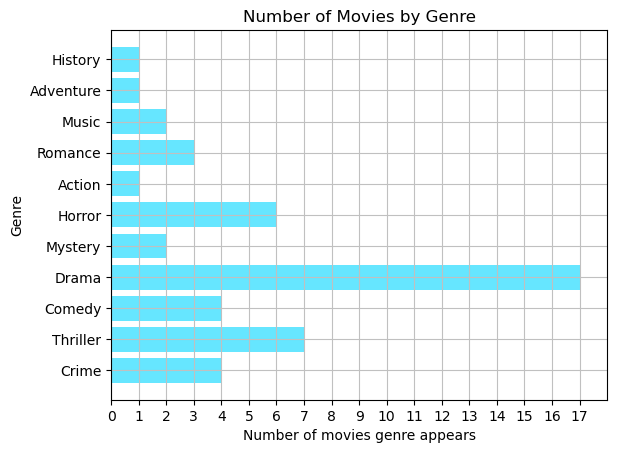

In [264]:
# plotting graph -- Genre vs counts
genres = list(movie_value_counts.keys())
counts = list(movie_value_counts.values())
cyan = (0.4, 0.9, 1)

plt.barh(genres, counts, color=cyan)
plt.xlim(0, 18)
plt.xticks(range(0, 18, 1))


plt.grid(which='both', color='silver')

plt.xlabel('Number of movies genre appears')
plt.ylabel('Genre')
plt.title('Number of Movies by Genre')
plt.show()
# We cannot sirt by counts, since we are using a dict.

# Summary

## Conclusion
Based on the grossing, most movies generally did not have a production budget higher than 1 billion, the ROI was also not more than that figure. A lot of them had a production budget of less than $500,000,000, with the ROI being in the same ballpark.
The top genre whose style is most commonly used in the most popular movies is Drama, followed by thriller and Horror.

## Recommendations

These are the recommendations on what to focus on, especially for a start up studio.
1. Focus on the Drama and Thriller genres as they are the top genres consumed. This will heavily influence the popularity of the movie.
2. Focus on high production quality, which translates to having a sufficient budget, this is about $500,000,000.
3. While making these movies, consider the international audience, as the make up for most of the ROI. English language movies are the most consumed movies. This is to be considered during cast selection.

A further analysis could give even more insights to improve movie production quality and increase in a positive reception by audience. Factors like; 
- cast members and directors
- Marketing strategies